# **Curve Fitting with a Linear Regressor (Vanilla)**

In this basic example, we will solve a *regression* problem with a simple linear model.
We have a training set composed of inputs $\mathbf{x} =[x_{1},x_{2},..,x_{i}, ..., x_{N}]^T$ and labels $\mathbf{y} =[y_{1},y_{2},..,y_{i}, ..., y_{N}]^T$, where $x_{i}, y_{i} \in \mathbb{R}$.
The goal is to find a function $f(x): \mathbb{R} \to \mathbb{R}$ that fits well with my dataset.

In this case, we employ a parametrized linear model:

$f(x,w_0, w_1) = w_0 + w_1x$

where the learnable parameters are $\theta = [w_0, w_1]^T$.



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def linear_model(x, w0=0.0, w1=1.0):
  """Linear model parametrized by w0 and w1"""
  return w0 + x * w1

# **1. Dataset creation**

Let's draw some samples for training and test.

In [ ]:
def get_label(x, sigma=1.5, mu=0.0):
  """This function gets the label for the input x.
  It adds a small noise to model imperfect observations.
  """
  noise = sigma * np.random.randn(x.size)+ mu
  # In this case, we use a linear model
  return 2* x + 3 + noise

In [ ]:
def get_dataset(N):
  "This function creates a dataset with N examples."
  x = np.random.uniform(low=0.0, high=2 * math.pi, size=N)
  return x, get_label(x)


In [ ]:
# Let's draw the training and test set
x_train, y_train = get_dataset(100)
x_test, y_test = get_dataset(25)

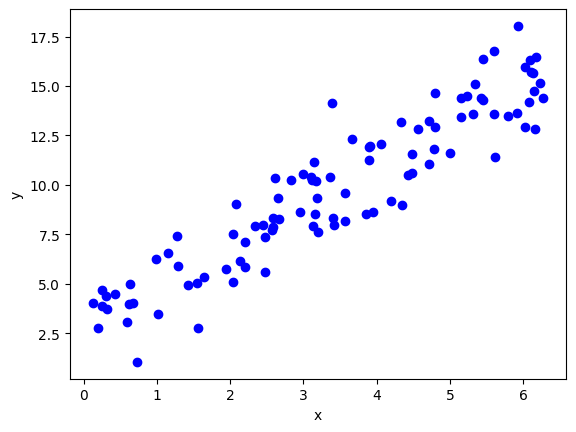

In [ ]:
# We can plot the training samples
plt.plot(x_train, y_train, 'o', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Remark**:

As you can see, we sample data from a linear function (with a little Gaussian noise added). In a real machine learning problem, however, we have **no access** to the **data generation** process. For example, in an object classification problem, we don't know the complex function that maps the pixels of an image to some output classes.

In this toy example, we assume to know the data generation function because, this way, we can easily **sample** examples from it.
In any case, the machine learning algorithm only sees the training samples drawn from this model and does not have access to the data generation function itself.

# **2. Training**
The goal of training is to find a function that fits well the training data.
One possible idea could be to start with random parameters and evaluate how the corresponding function performs on the training set.

Let's start for instance with $w_0 = 0$ and $w_1=1$.


In [ ]:
y_pred = linear_model(x_train, w0=0, w1=1)

For a regression problem, we can use the Mean Squared Error (MSE) as objective function (the lower the better):

46.13587429359842


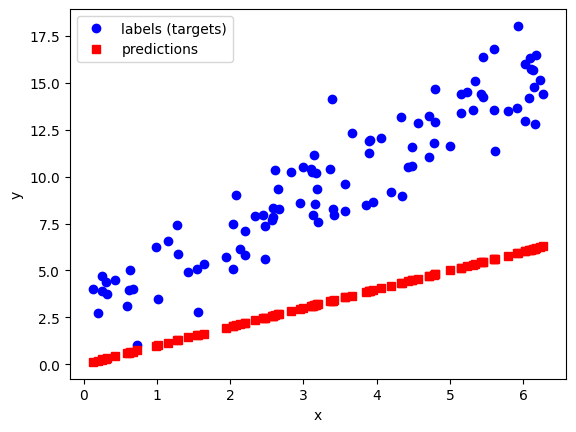

46.13587429359842


In [ ]:
def mse(y, pred):
  return ((y - pred)**2).mean()

mse_candidate_1 = mse(y_train, y_pred)
print(mse_candidate_1)


# Let's plot predictions vs labels
plt.plot(x_train, y_train, 'o', color='blue')
plt.plot(x_train, y_pred, 's', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['labels (targets)','predictions'])
plt.show()

mse_candidate_2 = mse(y_train, y_pred)
print(mse_candidate_2)

Let's now try to do a little step forward and backward for all the parameters, and let's monitor how the performance changes:

In [ ]:
# w0 -> increase, w1 -> increase
y_pred = linear_model(x_train, w0=0+0.5, w1=1+0.5)
print(mse(y_train, y_pred))

y_pred = linear_model(x_train, w0=0-0.5, w1=1+0.5)
print(mse(y_train, y_pred))

y_pred = linear_model(x_train, w0=0+0.5, w1=1 - 0.5)
print(mse(y_train, y_pred))

y_pred = linear_model(x_train, w0=0-0.5, w1=1 - 0.5)
print(mse(y_train, y_pred))

20.261709221820308
29.55980535632049
67.32809170584244
83.4889642544373


Ok, the best MSE is observed when increasing a bit both the parameters.
Let's do a step in this direction.

20.261709221820308


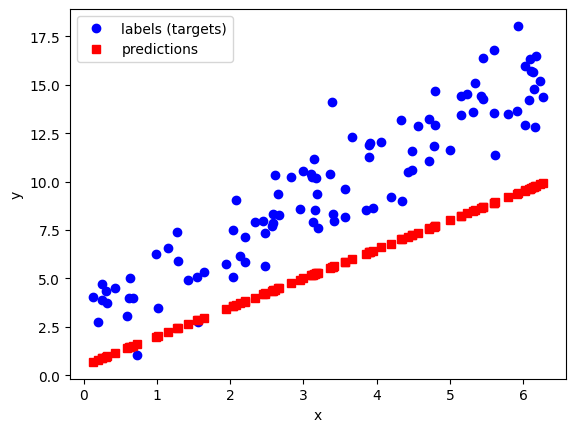

In [ ]:
y_pred = linear_model(x_train, w0=0.5, w1=1.5)

mse_candidate_1 = mse(y_train, y_pred)
print(mse_candidate_1)


# Let's plot predictions vs labels
plt.plot(x_train, y_train, 'o', color='blue')
plt.plot(x_train, y_pred, 's', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['labels (targets)','predictions'])
plt.show()


We now have a slightly better function, but we are still unhappy. To further improve it, we can repeat this game multiple times.

Let's write a simple function to implement this training loop:

2.374483874287051
1.9000000000000004 2.3000000000000007


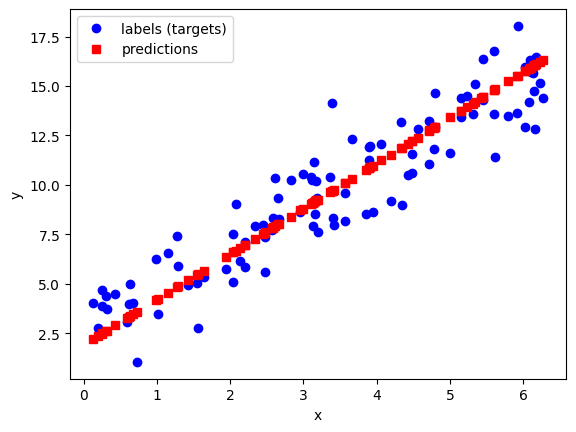

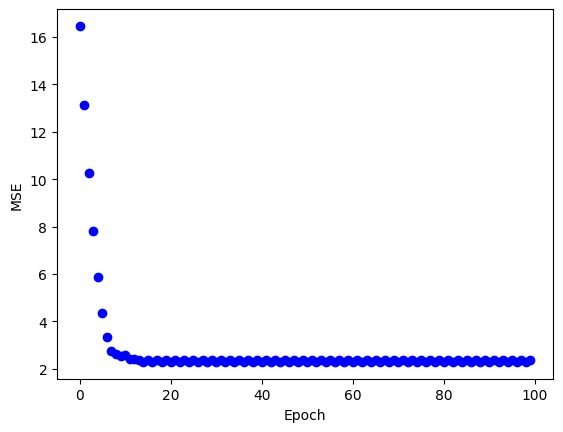

In [ ]:
def update_parameters(w0, w1, x_train, y_train, step_size=0.1):
  """This function does a step ahead and forward
  for each parameter and chooses the parameter
  combination that minimizes the MSE
  """

  # Initialize arrays
  performance = np.empty(4)
  parameters = np.empty([4,2])

  # Positive step for w0, positive step for w1
  parameters[0,0] = w0 + step_size
  parameters[0,1] = w1 + step_size
  y_pred = linear_model(x_train, w0=parameters[0,0], w1=parameters[0,1])
  performance[0] = mse(y_train, y_pred)

  # Negative step for w0, positive step for w1
  parameters[1,0] = w0 - step_size
  parameters[1,1] = w1 + step_size
  y_pred = linear_model(x_train, w0=parameters[1,0], w1=parameters[1,1])
  performance[1] = mse(y_train, y_pred)

  # Positive step for w0, negative step for w1
  parameters[2,0] = w0 + step_size
  parameters[2,1] = w1 - step_size
  y_pred = linear_model(x_train, w0=parameters[2,0], w1=parameters[2,1])
  performance[2] = mse(y_train, y_pred)

  # Negative step for w0, negative step for w1
  parameters[3,0] = w0 - step_size
  parameters[3,1] = w1 - step_size
  y_pred = linear_model(x_train, w0=parameters[3,0], w1=parameters[3,1])
  performance[3] = mse(y_train, y_pred)

  # Check the best performance
  best_index = np.argmin(performance)
  return performance[best_index], parameters[best_index,0], parameters[best_index,1]

def training_loop(w0, w1, N_epochs):
  """This function updates the parameters N_epochs times"""
  mse_epoch = []
  for i in range(100):
    mse_best, w0, w1 = update_parameters(w0, w1, x_train, y_train, step_size=0.1)
    mse_epoch.append(mse_best)
  return w0, w1, mse_epoch

# Training
w0 = 0.50
w1 = 1.5

w0_best, w1_best, mse_epoch = training_loop(w0, w1, 100)

# Best Candidate
y_pred = linear_model(x_train, w0_best, w1_best)
mse_candidate_1 = mse(y_train, y_pred)
print(mse_candidate_1)
print(w0_best, w1_best)

# Let's plot predictions vs labels
plt.plot(x_train, y_train, 'o', color='blue')
plt.plot(x_train, y_pred, 's', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['labels (targets)','predictions'])
plt.show()

# Let's see how the MSE decreases during training
plt.plot(mse_epoch, 'o', color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


# **Test**
We found a function that matches well with the training data. But what about the performance of the test set?

Let's compute it:

3.122768654749363


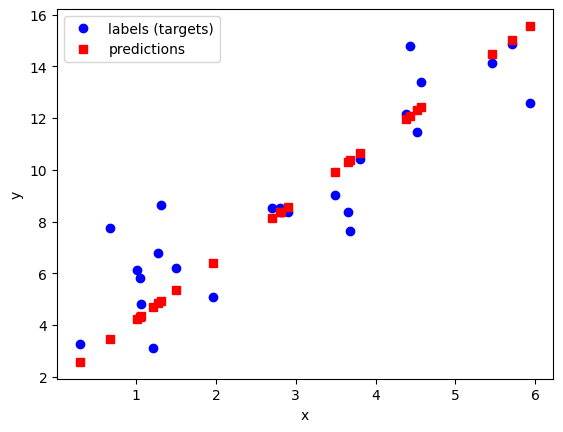

In [ ]:
# Best Candidate
y_pred = linear_model(x_test, w0_best, w1_best)
best_candidate_mse = mse(y_test, y_pred)
print(best_candidate_mse)

# Let's plot predictions vs labels
plt.plot(x_test, y_test, 'o', color='blue')
plt.plot(x_test, y_pred, 's', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['labels (targets)','predictions'])
plt.show()


The performance on the test is quite good as well.

# **Conclusion**

We have seen a simple way to train a parametrized linear regressor. We trained by applying small variations to our parameters and choosing the parameter configuration that maximized the MSE. As we will see in the next lecture, this "little step" in the direction that optimizes the cost function is what we will call "gradient".